# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. Furthermore, we will provide best practices and introduce visualization tools for effectively conducting big data analysis and visualization.

---

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Conclusion
8. References

---

## Introduction
In this notebook I will explore a text-based, document-based [dataset](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) using scientific computing tools such as Pandas and Numpy. In addition, several fundamental Data Mining concepts will be explored and explained in details, ranging from calculating distance measures to computing term frequency vectors. Coding examples, visualizations and demonstrations will be provided where necessary. Furthermore, additional exercises are provided after special topics. These exercises are geared towards testing the proficiency of students and motivate students to explore beyond the techniques covered in the notebook. 

---

### Requirements
Here are the computing and software requirements

#### Computing Resources
- Operating system: Preferably Linux or MacOS
- RAM: 8 GB
- Disk space: Mininium 8 GB

#### Software Requirements
Here is a list of the required programs and libraries necessary for this lab session:

##### Language:
- [Python 3+](https://www.python.org/download/releases/3.0/) (Note: coding will be done strictly on Python 3)
    - We are using Python 3.9.6.
    - You can use newer version, but use at your own risk.
    
##### Environment:
Using an environment is to avoid some library conflict problems. You can refer this [Setup Instructions](http://cs231n.github.io/setup-instructions/) to install and setup.

- [Anaconda](https://www.anaconda.com/download/) (recommended but not required)
    - Install anaconda environment
    
- [Python virtualenv](https://virtualenv.pypa.io/en/stable/userguide/) (recommended to Linux/MacOS user)
    - Install virtual environment

- [Kaggle Kernel](https://www.kaggle.com/kernels/)
    - Run on the cloud  (with some limitations)
    - Reference: [Kaggle Kernels Instructions](https://github.com/omarsar/data_mining_lab/blob/master/kagglekernel.md)
    
##### Necessary Libraries:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install `jupyter` and Use `$jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install `sklearn` latest python library
- [Pandas](http://pandas.pydata.org/)
    - Install `pandas` python library
- [Numpy](http://www.numpy.org/)
    - Install `numpy` python library
- [Matplotlib](https://matplotlib.org/)
    - Install `maplotlib` for python
- [Plotly](https://plot.ly/)
    - Install and signup for `plotly`
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install `nltk` library

---

In [112]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. The Data

If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas. 

The dataset contains a sentence and score label. 

---

## 2. Data Preparation
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

In [113]:
# input the data
train_data = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/amazon_cells_labelled.txt')
text1 = []
for line in train_data:
    text1.append(line)
print(text1)

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n', 'Good case, Excellent value.\t1\n', 'Great for the jawbone.\t1\n', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n', 'The mic is great.\t1\n', 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n', 'If you are Razr owner...you must have this!\t1\n', 'Needless to say, I wasted my money.\t0\n', 'What a waste of money and time!.\t0\n', 'And the sound quality is great.\t1\n', 'He was very impressed when going from the original battery to the extended battery.\t1\n', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\n', 'Very good quality though\t1\n', 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0\n', 'Highly recommend

In [114]:
# second data
train_data2 = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/imdb_labelled.txt',encoding="utf-8")
text2 = []
for line in train_data2:
    text2.append(line)
print(text2)

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0\n', 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0\n', 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0\n', 'Very little music or anything to speak of.  \t0\n', 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1\n', "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0\n", 'Wasted two hours.  \t0\n', 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1\n', 'A bit predictable.  \t0\n', 'Loved the casting of Jimmy Buffet as the science teacher.  \t1\n', 'And those baby owls were adorable.  \t1\n', "The movie showed a lot of Florida at it's best

In [115]:
# third data
train_data3 = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/yelp_labelled.txt',encoding="utf-8")
text3 = []
for line in train_data3:
    text3.append(line)
print(text3)

['Wow... Loved this place.\t1\n', 'Crust is not good.\t0\n', 'Not tasty and the texture was just nasty.\t0\n', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\n', 'The selection on the menu was great and so were the prices.\t1\n', 'Now I am getting angry and I want my damn pho.\t0\n', "Honeslty it didn't taste THAT fresh.)\t0\n", 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\n', 'The fries were great too.\t1\n', 'A great touch.\t1\n', 'Service was very prompt.\t1\n', 'Would not go back.\t0\n', 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\n', 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\n', 'I was disgusted because I was pretty sure that was human hair.\t0\n', 'I was shocked because no signs indicate cash only.\t0\n', 'Highly recommended.\t1\n', 'Waitress was a little slow in service.\t0\n', 'This 

Let's take at look some of the records that are contained in our subset of the data

In [116]:
text[0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n']

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [117]:
len(text)

1000

#### We can also print an example from the subset

In [118]:
import pandas as pd
text_data = pd.DataFrame(text,columns=['text'])
text_data2 = pd.DataFrame(text2,columns=['text'])
text_data3 = pd.DataFrame(text3,columns=['text'])
text_data

text
0    So there is no way for me to plug it in here i...
1                     Good case, Excellent value.\t1\n
2                          Great for the jawbone.\t1\n
3    Tied to charger for conversations lasting more...
4                               The mic is great.\t1\n
..                                                 ...
995  The screen does get smudged easily because it ...
996  What a piece of junk.. I lose more calls on th...
997                  Item Does Not Match Picture.\t0\n
998  The only thing that disappoint me is the infra...
999  You can not answer calls with the unit, never ...

[1000 rows x 1 columns]

### add cloumns
plus the category of data, different website:

In [119]:
text_data['category'] = 'amazon'
text_data2['category'] = 'imdb'
text_data3['category'] = 'yelp'
text_data

text category
0    So there is no way for me to plug it in here i...   amazon
1                     Good case, Excellent value.\t1\n   amazon
2                          Great for the jawbone.\t1\n   amazon
3    Tied to charger for conversations lasting more...   amazon
4                               The mic is great.\t1\n   amazon
..                                                 ...      ...
995  The screen does get smudged easily because it ...   amazon
996  What a piece of junk.. I lose more calls on th...   amazon
997                  Item Does Not Match Picture.\t0\n   amazon
998  The only thing that disappoint me is the infra...   amazon
999  You can not answer calls with the unit, never ...   amazon

[1000 rows x 2 columns]

add score in each sentence

In [120]:
text_data['score'] = text_data['text'].apply(lambda x:str(x)[-2:-1])
text_data2['score'] = text_data2['text'].apply(lambda x:str(x)[-2:-1])
text_data3['score'] = text_data3['text'].apply(lambda x:str(x)[-2:-1])
text_data

text category score
0    So there is no way for me to plug it in here i...   amazon     0
1                     Good case, Excellent value.\t1\n   amazon     1
2                          Great for the jawbone.\t1\n   amazon     1
3    Tied to charger for conversations lasting more...   amazon     0
4                               The mic is great.\t1\n   amazon     1
..                                                 ...      ...   ...
995  The screen does get smudged easily because it ...   amazon     0
996  What a piece of junk.. I lose more calls on th...   amazon     0
997                  Item Does Not Match Picture.\t0\n   amazon     0
998  The only thing that disappoint me is the infra...   amazon     0
999  You can not answer calls with the unit, never ...   amazon     0

[1000 rows x 3 columns]

In [121]:
text_data['text'] = text_data['text'].apply(lambda x:x.split('.')[0])
text_data['text'] = text_data['text'] + '.'
text_data2['text'] = text_data2['text'].apply(lambda x:x.split('.')[0])
text_data2['text'] = text_data2['text'] + '.'
text_data3['text'] = text_data3['text'].apply(lambda x:x.split('.')[0])
text_data3['text'] = text_data3['text'] + '.'
text_data

text category score
0    So there is no way for me to plug it in here i...   amazon     0
1                          Good case, Excellent value.   amazon     1
2                               Great for the jawbone.   amazon     1
3    Tied to charger for conversations lasting more...   amazon     0
4                                    The mic is great.   amazon     1
..                                                 ...      ...   ...
995  The screen does get smudged easily because it ...   amazon     0
996                              What a piece of junk.   amazon     0
997                       Item Does Not Match Picture.   amazon     0
998  The only thing that disappoint me is the infra...   amazon     0
999  You can not answer calls with the unit, never ...   amazon     0

[1000 rows x 3 columns]

combine 3 different company sentences

In [122]:
train = pd.concat([text_data, text_data2,text_data3], ignore_index=True)
len(train)

3000

In [123]:
train

text category score
0     So there is no way for me to plug it in here i...   amazon     0
1                           Good case, Excellent value.   amazon     1
2                                Great for the jawbone.   amazon     1
3     Tied to charger for conversations lasting more...   amazon     0
4                                     The mic is great.   amazon     1
...                                                 ...      ...   ...
2995  I think food should have flavor and texture an...     yelp     0
2996                           Appetite instantly gone.     yelp     0
2997  Overall I was not impressed and would not go b...     yelp     0
2998  The whole experience was underwhelming, and I ...     yelp     0
2999  Then, as if I hadn't wasted enough of my life ...     yelp     0

[3000 rows x 3 columns]

---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [124]:
# Answer here
for t in range(0,3):
    print(train.text[t])

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [125]:
train[0:2]

text category score
0  So there is no way for me to plug it in here i...   amazon     0
1                        Good case, Excellent value.   amazon     1

In [126]:
for t in train["text"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [127]:
train[0:10]

text category score
0  So there is no way for me to plug it in here i...   amazon     0
1                        Good case, Excellent value.   amazon     1
2                             Great for the jawbone.   amazon     1
3  Tied to charger for conversations lasting more...   amazon     0
4                                  The mic is great.   amazon     1
5  I have to jiggle the plug to get it to line up...   amazon     0
6  If you have several dozen or several hundred c...   amazon     0
7                             If you are Razr owner.   amazon     1
8                Needless to say, I wasted my money.   amazon     0
9                   What a waste of money and time!.   amazon     0

Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like **removing records with missing values** and **aggregating new fields** to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

---

### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category` attributes or fields.

In [128]:
# a simple query
train[:10][["text","category"]]

text category
0  So there is no way for me to plug it in here i...   amazon
1                        Good case, Excellent value.   amazon
2                             Great for the jawbone.   amazon
3  Tied to charger for conversations lasting more...   amazon
4                                  The mic is great.   amazon
5  I have to jiggle the plug to get it to line up...   amazon
6  If you have several dozen or several hundred c...   amazon
7                             If you are Razr owner.   amazon
8                Needless to say, I wasted my money.   amazon
9                   What a waste of money and time!.   amazon

Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [129]:
train[-10:]

text category score
2990  The refried beans that came with my meal were ...     yelp     0
2991         Spend your money and time some place else.     yelp     0
2992  A lady at the table next to us found a live gr...     yelp     0
2993            the presentation of the food was awful.     yelp     0
2994           I can't tell you how disappointed I was.     yelp     0
2995  I think food should have flavor and texture an...     yelp     0
2996                           Appetite instantly gone.     yelp     0
2997  Overall I was not impressed and would not go b...     yelp     0
2998  The whole experience was underwhelming, and I ...     yelp     0
2999  Then, as if I hadn't wasted enough of my life ...     yelp     0

Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [130]:
# using loc (by label)
train.loc[:10, 'text']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7                                If you are Razr owner.
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: text, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [131]:
# using iloc (by position)
train.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7                               If you are Razr owner.
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: text, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [132]:
#Answer here
dataframe = pd.DataFrame(train, columns=['text', 'category', 'score'])
dataframe

text category score
0     So there is no way for me to plug it in here i...   amazon     0
1                           Good case, Excellent value.   amazon     1
2                                Great for the jawbone.   amazon     1
3     Tied to charger for conversations lasting more...   amazon     0
4                                     The mic is great.   amazon     1
...                                                 ...      ...   ...
2995  I think food should have flavor and texture an...     yelp     0
2996                           Appetite instantly gone.     yelp     0
2997  Overall I was not impressed and would not go b...     yelp     0
2998  The whole experience was underwhelming, and I ...     yelp     0
2999  Then, as if I hadn't wasted enough of my life ...     yelp     0

[3000 rows x 3 columns]

---

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```imdb``` category, and query every 10th record. Only show the first 5 records.

In [133]:
# Answer here
train[train['category']=='imdb'].iloc[::10][0:5]

text category score
1000  A very, very, very slow-moving, aimless movie ...     imdb     0
1010                 And those baby owls were adorable.     imdb     1
1020  I can think of no other film where something v...     imdb     1
1030  There are massive levels, massive unlockable c...     imdb     1
1040  The very idea of it was lame - take a minor ch...     imdb     0

---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

First, let us consider that our dataset has some *missing values* and we want to remove those values. In its current state our dataset has no missing values, but for practice sake we will add some records with missing values and then write some code to deal with these objects that contain missing values. You will see for yourself how easy it is to deal with missing values once you have your data transformed into a Pandas dataframe.

Before we jump into coding, let us do a quick review of what we have learned in the Data Mining course. Specifically, let's review the methods used to deal with missing values.

The most common reasons for having missing values in datasets has to do with how the data was initially collected. A good example of this is when a patient comes into the ER room, the data is collected as quickly as possible and depending on the conditions of the patients, the personal data being collected is either incomplete or partially complete. In the former and latter cases, we are presented with a case of "missing values". Knowing that patients data is particularly critical and can be used by the health authorities to conduct some interesting analysis, we as the data miners are left with the tough task of deciding what to do with these missing and incomplete records. We need to deal with these records because they are definitely going to affect our analysis or learning algorithms. So what do we do? There are several ways to handle missing values, and some of the more effective ways are presented below (Note: You can reference the slides - Session 1 Handout for the additional information).

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you lose some information, and in some cases too much of it. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you ignore missing values, especially when in this day and age it is difficult to obtain high quality datasets? Again, there are some tradeoffs, which we will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based approach or probabilistic approach.  

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [134]:
# check missing values
train.isnull()

text  category  score
0     False     False  False
1     False     False  False
2     False     False  False
3     False     False  False
4     False     False  False
...     ...       ...    ...
2995  False     False  False
2996  False     False  False
2997  False     False  False
2998  False     False  False
2999  False     False  False

[3000 rows x 3 columns]

The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [135]:
import helpers.data_mining_helpers as dmh
train.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                score  
0  The amoung of missing records is:   
1                                   0

Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [136]:
# Answer here
train.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [137]:
dummy_series = pd.Series(["dummy_record", "amazon"], index=["text", "category"])

In [138]:
dummy_series

text        dummy_record
category          amazon
dtype: object

In [139]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record   amazon

In [140]:
result_with_series = pd.concat([train, dummy_series.to_frame().T], ignore_index=True)

In [141]:
# check if the records was commited into result
len(result_with_series)

3001

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [142]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                score  
0  The amoung of missing records is:   
1                                   1

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `score` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `train`. Notice that above we are not changing the `train` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `train` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [143]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [144]:
train = pd.concat([train, pd.DataFrame(dummy_dict)], ignore_index=True)

In [145]:
len(train)

3001

In [146]:
train.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                score  
0  The amoung of missing records is:   
1                                   1

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [147]:
train.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [148]:
train.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                score  
0  The amoung of missing records is:   
1                                   0

In [149]:
len(train)

3000

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [150]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [151]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [152]:
# Answer here
# 2,3 are False because the name is just object not a NaN
# 5 is False because tab also is a object

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [153]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [154]:
sum(train.duplicated())

18

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by only checking the `text` attribute. 

In [155]:
sum(train.duplicated('text'))

19

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [156]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'score': 1
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'score': 1
                        }]

In [158]:
train = pd.concat([train, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [159]:
len(train)

3004

In [160]:
sum(train.duplicated('text'))

22

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [161]:
train.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [162]:
len(train)

2964

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [163]:
train_sample = train.sample(n=1000) #random state

In [164]:
len(train_sample)

1000

In [165]:
train_sample[0:4]

text category score
1193                     There were too many close ups.     imdb     0
1312                This is such a fun and funny movie.     imdb     1
2502      Cant say enough good things about this place.     yelp     1
1419  Only like 3 or 4 buildings used, a couple of l...     imdb     0

---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [166]:
# Answer here
# because the answer is random, the index will not be sort. However, the format is same.
train_sample[-5:]

text category score
2609                  I will not be eating there again.     yelp     0
1569  Okay, I like to consider myself a fair critic,...     imdb     1
1127  My only problem is I thought the actor playing...     imdb     0
575   I can barely ever hear on it and am constantly...   amazon     0
2220  The shower area is outside so you can only rin...     yelp     0

---

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity(差距) between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb      992
yelp      992
amazon    980
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

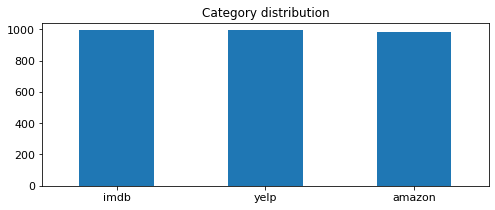

In [168]:
print(train.category.value_counts())

# plot barchart for X
train.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
#                                     ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      339
yelp      332
amazon    329
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

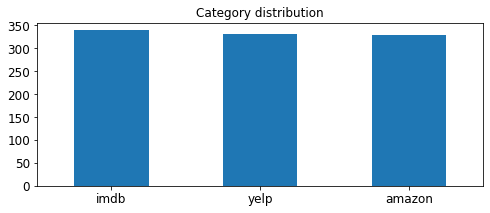

In [170]:
print(train_sample.category.value_counts())

# plot barchart for X_sample
train_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
#                                            ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

imdb      339
yelp      332
amazon    329
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

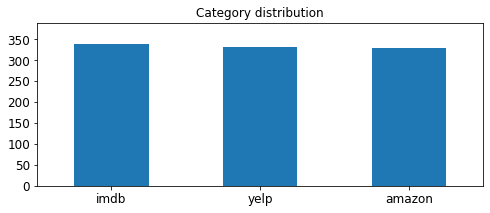

In [171]:
# Answer here

# plot barchart for X_sample

print(train_sample.category.value_counts())
upper_bound = max(train_sample.category.value_counts() + 50)
# plot barchart for X_sample
train_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                            ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

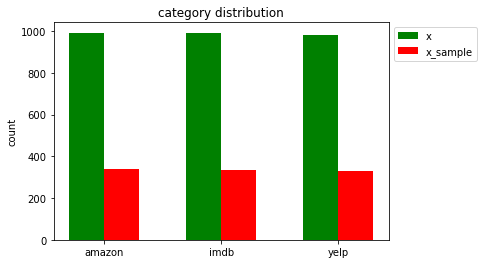

In [173]:
# Answer here
cate = ['amazon', 'imdb', 'yelp']
width = 0.3
x = np.arange(len(cate))
plt.bar(x, train.category.value_counts(), width, color='green', label='x')
plt.bar(x + width, train_sample.category.value_counts(), width, color='red', label='x_sample')
plt.xticks(x + width / 2, cate)
plt.ylabel('count')
plt.title('category distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [174]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
# takes a like a minute or two to process
train['unigrams'] = train['text'].apply(lambda x: dmh.tokenize_text(x))

In [176]:
train[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

If you take a closer look at the `train` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [177]:
train[0:4]

text category score  \
0  So there is no way for me to plug it in here i...   amazon     0   
1                        Good case, Excellent value.   amazon     1   
2                             Great for the jawbone.   amazon     1   
3  Tied to charger for conversations lasting more...   amazon     0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [178]:
list(train[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4026)	1
  (0, 4393)	1
  (0, 2347)	1
  (0, 2942)	1
  (0, 4827)	1
  (0, 1772)	1
  (0, 2715)	1
  (0, 4456)	1
  (0, 3274)	1
  (0, 2352)	1
  (0, 2238)	2
  (0, 2085)	1
  (0, 4380)	1
  (0, 4679)	1
  (0, 4638)	1
  (0, 1916)	1
  (0, 623)	1
  (0, 978)	1


What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [180]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [181]:
# Answer here
analyze(train.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [182]:
analyze(" ".join(list(train[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

---

Now let us look at the term-document matrix we built above.

In [183]:
# We can check the shape of this matrix by:
X_counts.shape

(2964, 4992)

In [184]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['10', '100', '11', '12', '13', '15', '17', '18', '18th', '1928']

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `train`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [185]:
X_counts.shape

(2964, 4992)

In [187]:
# we convert from sparse array to normal array
X_counts[300:305, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [188]:
count_vect.get_feature_names()[0:1]

['10']

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [190]:
# Answer here
count_vect.get_feature_names()[24]

'2007'

---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [195]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[10:30]]

In [196]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(train.index)[300:305]]

In [197]:
plot_z = X_counts[300:305, 10:30].toarray() #X_counts[how many doc,how many tern]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

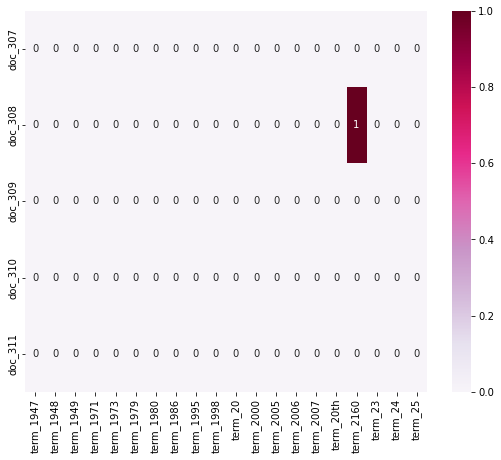

In [198]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [201]:
# Answer here
# only ten features 
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[30:40]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(train.index)[0:20]]
plot_z = X_counts[0:20, 30:40].toarray() #X_counts[how many doc,how many tern]

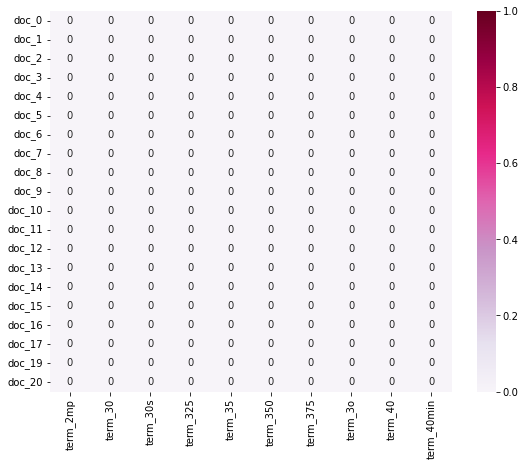

In [202]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

---

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [203]:
from sklearn.decomposition import PCA

In [204]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [205]:
X_reduced.shape

(2964, 2)

In [208]:
categories = ['amazon','imdb','yelp']

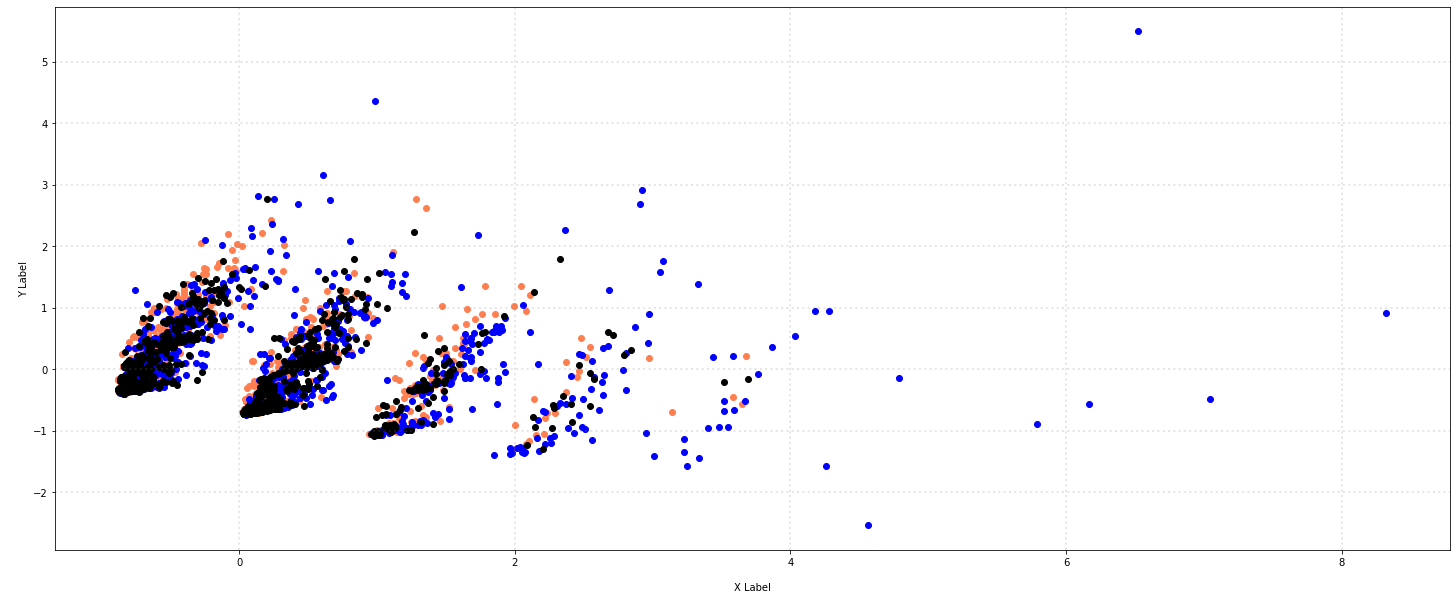

In [210]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[train['category'] == category].T[0]
    ys = X_reduced[train['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

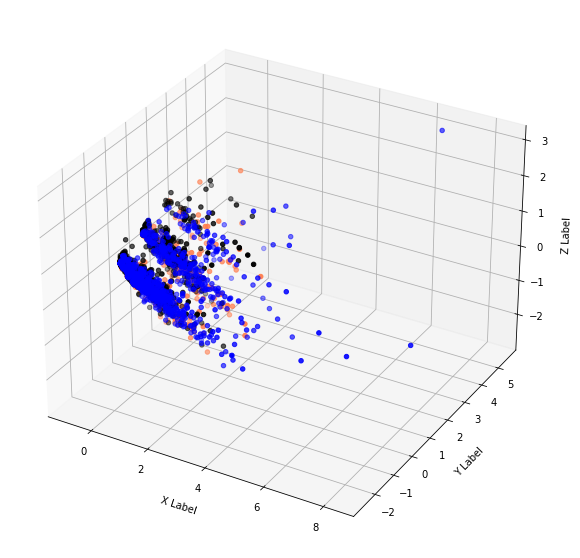

In [214]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

x_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = x_3d[train['category'] == category].T[0]
    ys = x_3d[train['category'] == category].T[1]
    zs = x_3d[train['category'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

---

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [215]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [216]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [217]:
term_frequencies[0] #sum of first term

32

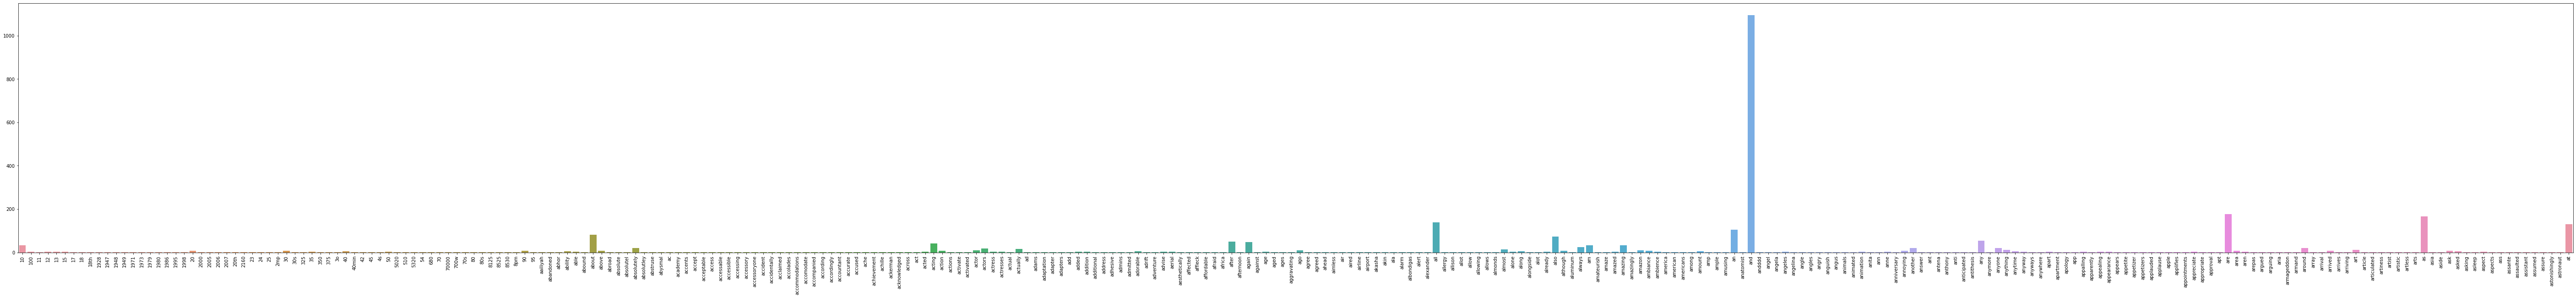

In [218]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [219]:
# Answer here
!pip install plotly

In [220]:
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML
index = {
    "name": count_vect.get_feature_names()[:300],
    "counts": term_frequencies[:300]
}
df = pd.DataFrame(index)
print(df)
fig = px.histogram(df,x="name", y="counts",
                    title='Histogram Chart')
fig.show()

              name  counts
0               10      32
1              100       3
2               11       1
3               12       3
4               13       3
..             ...     ...
295        assumed       1
296         assure       2
297  astonishingly       1
298      astronaut       2
299             at     130

[300 rows x 2 columns]


---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [221]:
# Answer here
# find the count > 50 value to visualize
de = df[df['counts'] > 50]
print(de)
fig = px.histogram(de,x="name", y="counts",
                    title='Histogram Chart')
fig.show()

      name  counts
67   about      81
166    all     139
180   also      73
201     an     105
203    and    1095
230    any      53
259    are     177
282     as     167
299     at     130


---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [222]:
# Answer here
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML
index = {
    "name": count_vect.get_feature_names()[:300],
    "counts": term_frequencies[:300]
}
df = pd.DataFrame(index)
print(df)
df_sort = df.sort_values(by=['counts'],ascending=False)
fig = px.histogram(df_sort,x="name", y="counts",
                    title='Histogram Chart')
fig.show()

              name  counts
0               10      32
1              100       3
2               11       1
3               12       3
4               13       3
..             ...     ...
295        assumed       1
296         assure       2
297  astonishingly       1
298      astronaut       2
299             at     130

[300 rows x 2 columns]


---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [223]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

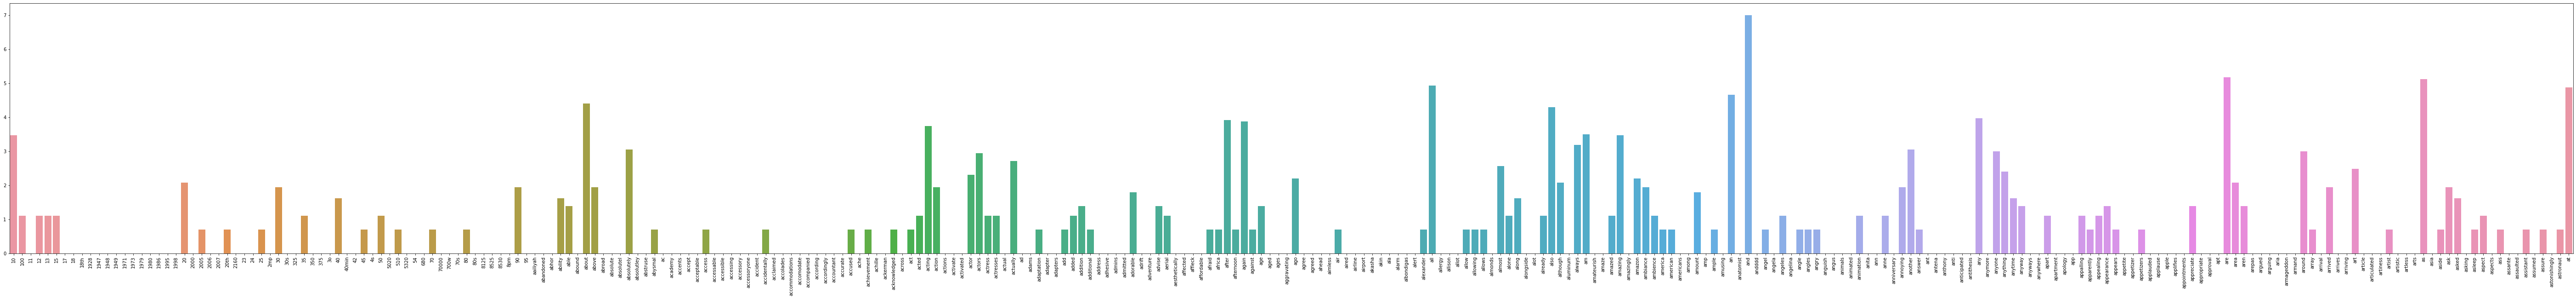

In [224]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [225]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [226]:
mlb = preprocessing.LabelBinarizer()

In [227]:
mlb.fit(train.category)

LabelBinarizer()

In [228]:
train['bin_category'] = mlb.transform(train['category']).tolist()

In [229]:
train[0:9]

text category score  \
0  So there is no way for me to plug it in here i...   amazon     0   
1                        Good case, Excellent value.   amazon     1   
2                             Great for the jawbone.   amazon     1   
3  Tied to charger for conversations lasting more...   amazon     0   
4                                  The mic is great.   amazon     1   
5  I have to jiggle the plug to get it to line up...   amazon     0   
6  If you have several dozen or several hundred c...   amazon     0   
7                             If you are Razr owner.   amazon     1   
8                Needless to say, I wasted my money.   amazon     0   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...    [1, 0, 0]  
1               [Good, case, ,, Excellent, value, .]    [1, 0, 0]  
2                      [Great, for, the, jawbone, .]    [1, 0, 0]  
3  [Tied, to, charger, for, conversations, lastin...    [1, 0, 0]  
4                           [The, mic, is, great, .]    [1, 0, 0]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...    [1, 0, 0]  
6  [If, you, have, several, dozen, or, several, h...    [1, 0, 0]  
7                     [If, you, are, Razr, owner, .]    [1, 0, 0]  
8    [Needless, to, say, ,, I, wasted, my, money, .]    [1, 0, 0]

Take a look at the new attribute we have added to the `train` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `score` column instead. Does it work?

In [231]:
# Answer here
train['bin_score'] = mlb.transform(train['score']).tolist()
train[0:9]

# is not working, because it didn't define the sort of the score
# so it all the answer is 0

text category score  \
0  So there is no way for me to plug it in here i...   amazon     0   
1                        Good case, Excellent value.   amazon     1   
2                             Great for the jawbone.   amazon     1   
3  Tied to charger for conversations lasting more...   amazon     0   
4                                  The mic is great.   amazon     1   
5  I have to jiggle the plug to get it to line up...   amazon     0   
6  If you have several dozen or several hundred c...   amazon     0   
7                             If you are Razr owner.   amazon     1   
8                Needless to say, I wasted my money.   amazon     0   

                                            unigrams bin_category  bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...    [1, 0, 0]  [0, 0, 0]  
1               [Good, case, ,, Excellent, value, .]    [1, 0, 0]  [0, 0, 0]  
2                      [Great, for, the, jawbone, .]    [1, 0, 0]  [0, 0, 0]  
3  [Tied, to, charger, for, conversations, lastin...    [1, 0, 0]  [0, 0, 0]  
4                           [The, mic, is, great, .]    [1, 0, 0]  [0, 0, 0]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...    [1, 0, 0]  [0, 0, 0]  
6  [If, you, have, several, dozen, or, several, h...    [1, 0, 0]  [0, 0, 0]  
7                     [If, you, are, Razr, owner, .]    [1, 0, 0]  [0, 0, 0]  
8    [Needless, to, say, ,, I, wasted, my, money, .]    [1, 0, 0]  [0, 0, 0]

---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [232]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = train.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = train.iloc[1100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = train.iloc[2150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [233]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['The movie had you on the edge of your seat and made you somewhat afraid to go to your car at the end of the night.']
['Not a weekly haunt, but definitely a place to come back to every once in a while.']


In [234]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [235]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.049147
Cosine Similarity using count bw 1 and 3: 0.083333
Cosine Similarity using count bw 2 and 3: 0.147442
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

## 7. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as as Pandas and Scikit-learn. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## . References

- Pandas cook book ([Recommended for starters](http://pandas.pydata.org/pandas-docs/stable/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)